In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [39]:
wells = pd.read_csv('/work/Carpe-Datum-2022/Well_Head_and_Completion.csv')
wm = pd.read_csv('/work/Carpe-Datum-2022/Well_Log/WELL_MASTER_AI.csv')
wells = wells.merge(wm, how='left', left_on='WELL', right_on='well_id',).drop_duplicates('WELL')
new = pd.read_csv('new_df2.csv')
wells = wells.merge(new, how='left', left_on='WELL', right_on='Unnamed: 0', suffixes=(None,'_y'))
wells['line'] = -.29*wells['Y(ft)']+154670
time = pd.read_csv('/work/Carpe-Datum-2022/Production_History_Field.csv')
z = pd.DataFrame()
z['Start Date'] = time['Date'].iloc[time.drop('Date',axis=1).ne(0).idxmax()]
z['Well'] = time.drop('Date', axis=1).columns
z['Well'] = z['Well'].str.replace('WOPR:','').str.replace('\(bbl/day\)','')
z['Age'] = (pd.to_datetime('today') - pd.to_datetime(z['Start Date'])).dt.days
wells = wells.merge(z, how='left', left_on='WELL', right_on='Well')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [40]:
wells

,WELL,X(ft),Y(ft),Completion,Elevation Kelly Bushing (ft),Unnamed: 0,MD(ft),PORO(v/v),Permeability(mD),RHOB(g/cm3),...,Unnamed: 0_y,X(ft)_y,Y(ft)_y,Completion_y,Elevation Kelly Bushing (ft)_y,Sum_Production,line,Start Date,Well,Age
0,WP0,137106.82,83818.47,Upper,193.32,169,4597.471739,NaN,NaN,2.700700,...,WP0,137106.82,83818.47,Upper,193.32,475.695080,130362.6437,1-Jan-12,WP0,3738
1,WP1,132460.98,85832.77,Upper,187.15,473,4731.140545,NaN,NaN,2.564248,...,WP1,132460.98,85832.77,Upper,187.15,1005.566662,129778.4967,1-Nov-16,WP1,1972
2,WP2,133634.00,82144.52,Upper,164.55,1228,4687.021905,0.068448,0.010060,2.574827,...,WP2,133634.00,82144.52,Upper,164.55,443.228898,130848.0892,1-Feb-15,WP2,2611
3,WP3,140892.57,81747.12,Lower,179.92,1875,4734.050184,0.039348,NaN,2.690694,...,WP3,140892.57,81747.12,Lower,179.92,88345.368434,130963.3352,1-Dec-13,WP3,3038
4,WP4,109951.43,89343.45,Lower,186.21,1920,4372.429384,NaN,NaN,2.730268,...,WP4,109951.43,89343.45,Lower,186.21,8484.746653,128760.3995,1-May-19,WP4,1061
5,WP5,123950.95,92227.31,Lower,172.80,1188,4602.662001,NaN,NaN,2.465382,...,WP5,123950.95,92227.31,Lower,172.80,1056.718880,127924.0801,1-Sep-15,WP5,2399
6,WP6,111035.32,88692.32,Lower,182.66,557,4369.447677,NaN,NaN,NaN,...,WP6,111035.32,88692.32,Lower,182.66,30999.563162,128949.2272,1-Aug-19,WP6,969
7,WP7,112439.69,85560.85,Lower,181.09,145,4434.485528,0.046906,NaN,2.711619,...,WP7,112439.69,85560.85,Lower,181.09,71.108432,129857.3535,1-Feb-21,WP7,419
8,WP8,127369.74,91739.99,Upper,180.04,602,4665.319132,NaN,NaN,2.522050,...,WP8,127369.74,91739.99,Upper,180.04,654.773717,128065.4029,1-Mar-13,WP8,3313
9,WP9,115943.69,86730.44,Lower,178.25,105,4593.035411,NaN,NaN,2.528578,...,WP9,115943.69,86730.44,Lower,178.25,263.803390,129518.1724,1-May-12,WP9,3617


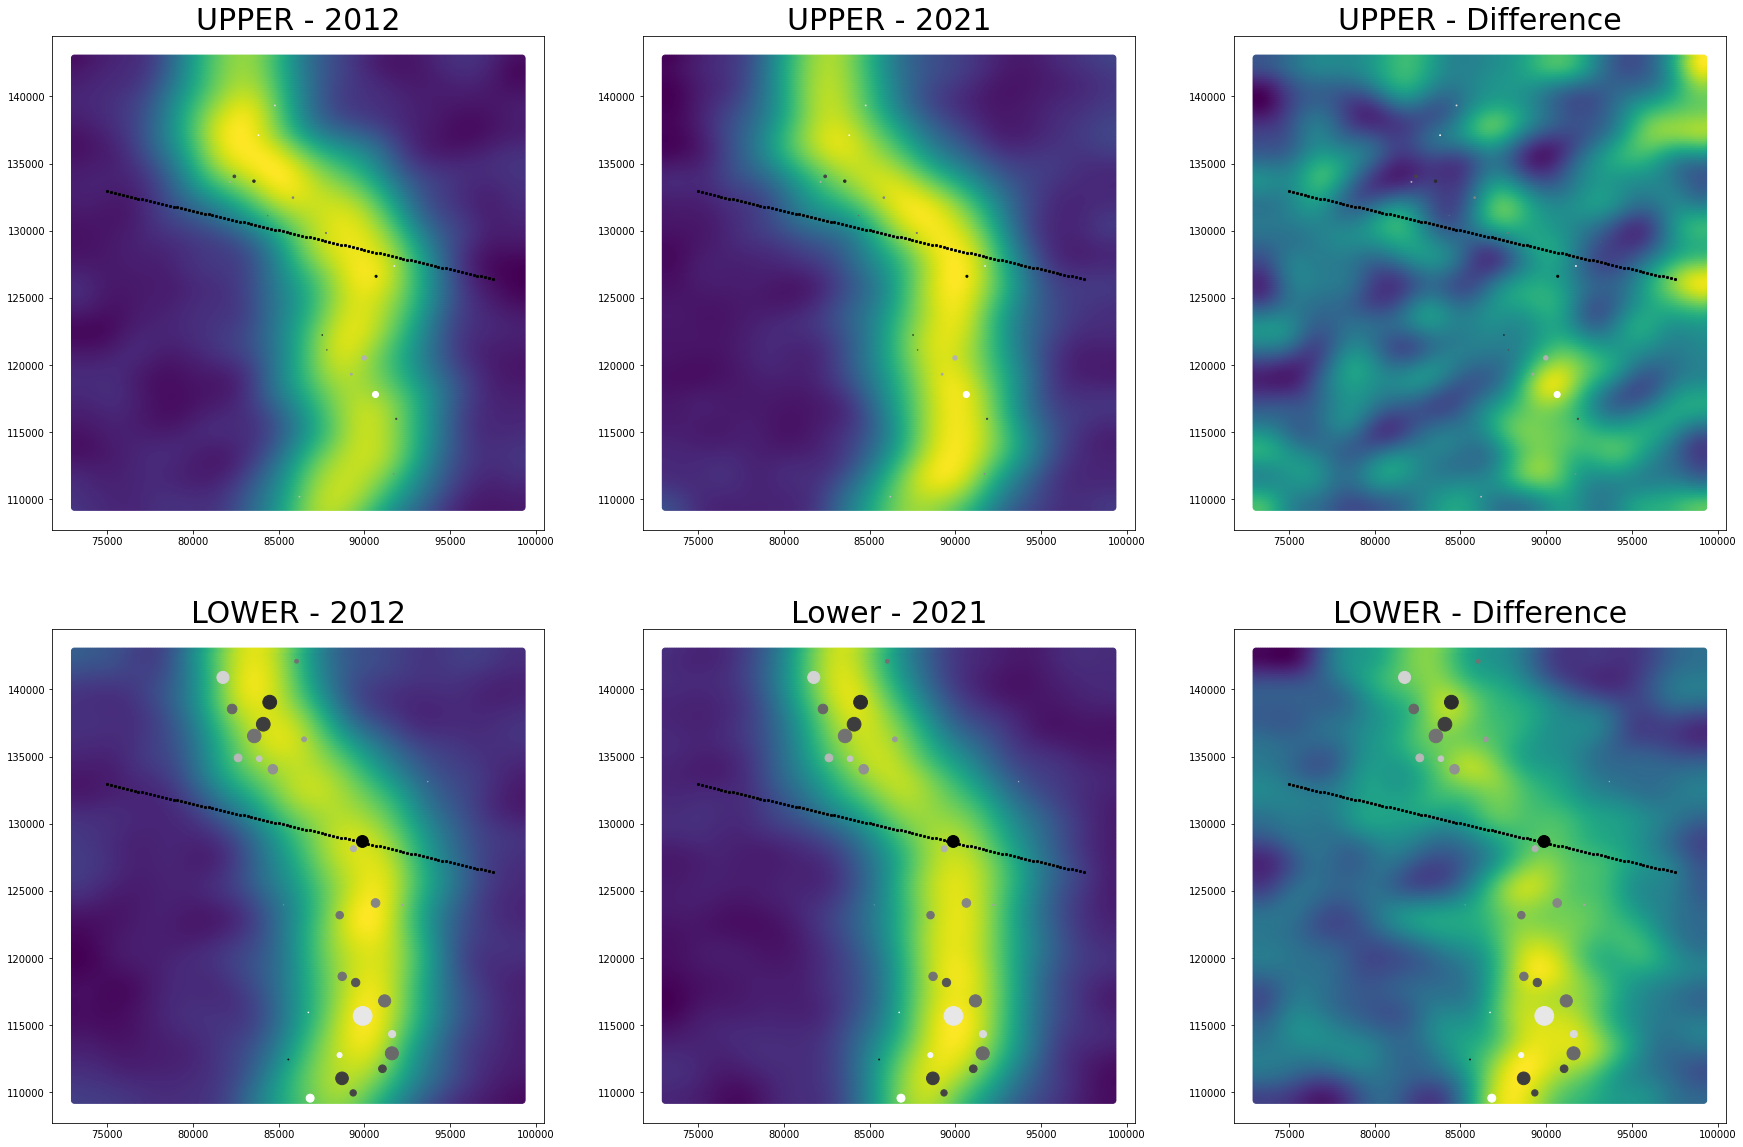

In [ ]:
t = np.linspace(75000, 97500, 100)
fault = -.29*t + 154670

fig, ax = plt.subplots(2, 3, figsize=(30,20))


#ax[0][0] = plt.figure(figsize=(10,10))
ax[0][0].scatter(ai['Y(ft)'], ai['X(ft)'], c=ai['AI_upper(2012-01-01)'], )
uppers = wells[wells['Completion'] == 'Upper']
ax[0][0].scatter(uppers['Y(ft)'], uppers['X(ft)'], s=uppers['Sum_Production']/.2/uppers['Age'], c=uppers['Age'], cmap='gray')
ax[0][0].scatter(t, fault, s=5, c='black', marker='x', label='faultline')
ax[0][0].set_title('UPPER - 2012', fontsize=30)

#ax[1][0] = plt.figure(figsize=(10,10))
ax[1][0].scatter(ai['Y(ft)'], ai['X(ft)'], c=ai['AI_lower(2012-01-01)'], )
lowers = wells[wells['Completion'] == 'Lower']
ax[1][0].scatter(lowers['Y(ft)'], lowers['X(ft)'], s=lowers['Sum_Production']/.2/lowers['Age'], c=lowers['Age'], cmap='gray')
ax[1][0].set_title('LOWER - 2012', fontsize=30)
ax[1][0].scatter(t, fault, s=5, c='black', marker='x', label='faultline')

#ax[0][1] = plt.figure(figsize=(10,10))
ax[0][1].scatter(ai['Y(ft)'], ai['X(ft)'], c=ai['AI_upper(2021-12-20)'], )
uppers = wells[wells['Completion'] == 'Upper']
ax[0][1].scatter(uppers['Y(ft)'], uppers['X(ft)'], s=uppers['Sum_Production']/.2/uppers['Age'], c=uppers['Age'], cmap='gray')
ax[0][1].set_title('UPPER - 2021', fontsize=30)
ax[0][1].scatter(t, fault, s=5, c='black', marker='x', label='faultline')

#ax[1][1] = plt.figure(figsize=(10,10))
ax[1][1].scatter(ai['Y(ft)'], ai['X(ft)'], c=ai['AI_lower(2021-12-20)'], )
lowers = wells[wells['Completion'] == 'Lower']
ax[1][1].scatter(lowers['Y(ft)'], lowers['X(ft)'], s=lowers['Sum_Production']/.2/lowers['Age'], c=lowers['Age'], cmap='gray')
ax[1][1].set_title('Lower - 2021', fontsize=30)
ax[1][1].scatter(t, fault, s=5, c='black', marker='x', label='faultline')

#ax[0][2] = plt.figure(figsize=(10,10))
ax[1][2].scatter(ai['Y(ft)'], ai['X(ft)'], c= -ai['AI_lower(2012-01-01)'] + ai['AI_lower(2021-12-20)'], )
lowers = wells[wells['Completion'] == 'Lower']
ax[1][2].scatter(lowers['Y(ft)'], lowers['X(ft)'], s=lowers['Sum_Production']/.2/lowers['Age'], c=lowers['Age'], cmap='gray')
ax[1][2].set_title('LOWER - Difference', fontsize=30)
ax[1][2].scatter(t, fault, s=5, c='black', marker='x', label='faultline')

#ax[1][2] = plt.figure(figsize=(10,10))
ax[0][2].scatter(ai['Y(ft)'], ai['X(ft)'], c=-ai['AI_upper(2012-01-01)'] + ai['AI_upper(2021-12-20)'], )
uppers = wells[wells['Completion'] == 'Upper']
ax[0][2].scatter(uppers['Y(ft)'], uppers['X(ft)'], s=uppers['Sum_Production']/.2/uppers['Age'], c=uppers['Age'], cmap='gray')
ax[0][2].set_title('UPPER - Difference', fontsize=30)
ax[0][2].scatter(t, fault, s=5, c='black', marker='x', label='faultline')
# validate using existing wells
plt.show()

Grid interpolation

Model

In [4]:
ai = pd.read_csv('/work/Carpe-Datum-2022/AI.csv')

In [5]:
data = pd.read_csv('/work/Carpe-Datum-2022/Well_Log/WELL_MASTER_AVG.csv')
data2 = pd.read_csv('/work/Carpe-Datum-2022/EDA_notebooks/two_year_forecast.csv')
data2['Well'] = data2['Unnamed: 0'].str.replace('WOPR:','').str.replace('\(bbl/day\)','')
data = data.merge(data2[['sum','Well']], left_on='well_id', right_on='Well')
data['diff_lower'] = data['AI_lower(2021-12-20)'] - data['AI_lower(2012-01-01)']
data['diff_upper'] = data['AI_upper(2021-12-20)'] - data['AI_upper(2012-01-01)']

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
data

,well_id,MD(ft),PORO(v/v),RHOB(g/cm3),DTS(us/ft),DT(us/ft),PEF(B/E),RD(OHMM),RS(OHMM),ROP,...,AI_lower(2021-12-20),AI_upper(2021-12-20),scaled_X,scaled_Y,scaled_MD,perm_est,sum,Well,diff_lower,diff_upper
0,WP0,4725.391739,0.123952,2.570550,130.203580,75.877758,7.374498,159.957113,163.229965,15.932319,...,6634.575426,6527.501690,1.248842,-4.192089,-12.267776,9.279788,220.623568,WP0,77.328918,-3.218868
1,WP1,4868.900545,0.197252,2.469263,128.033236,92.942081,0.050404,177.904391,178.418855,25.259734,...,6609.410946,6523.670945,0.774485,-3.986422,-12.253123,33.898785,967.220104,WP1,69.974609,1.306419
2,WP10,4818.174657,0.135442,2.392931,127.631000,86.678756,4.433433,189.982991,184.900881,18.849304,...,6514.257843,6472.958573,0.936000,-4.335770,-12.258302,10.187213,1165.743198,WP10,45.299221,-21.722941
3,WP12,4808.270995,0.112104,2.470077,143.509402,79.574038,0.042712,133.506294,206.343517,26.269538,...,6362.624740,6322.316898,0.843507,-3.184013,-12.259313,4.183912,17.758218,WP12,13.457871,8.808855
4,WP13,4531.991055,0.116319,2.470225,135.242368,79.086781,6.662322,171.803688,272.042627,15.320779,...,6657.606436,6535.592182,-0.568148,-3.639142,-12.287522,5.352267,586.702696,WP13,102.453196,28.921746
5,WP14,4781.602978,0.138503,2.476446,129.706729,75.289129,5.762926,144.473656,173.289089,19.841724,...,6603.209523,6519.123698,1.017111,-4.187255,-12.262036,9.386436,10456.887672,WP14,72.155735,-21.034330
6,WP15,4405.841183,0.166138,2.342374,137.665461,94.616725,6.752726,82.461831,83.107373,29.348219,...,6591.247729,6491.410104,-1.563761,-3.884232,-12.300403,18.689149,89215.309574,WP15,87.817361,-0.068139
7,WP16,4562.928038,0.132173,2.482244,117.720691,76.430410,5.907931,145.416383,169.218916,19.972302,...,6594.903877,6497.647510,-1.222906,-3.397418,-12.284364,8.524977,37745.757428,WP16,93.171297,17.853044
8,WP17,4600.599989,0.171052,2.351391,135.123632,89.054847,4.039047,266.396683,229.007122,20.025336,...,6654.707208,6534.917152,-1.236396,-3.709010,-12.280517,19.741620,23612.440193,WP17,102.483309,26.175133
9,WP18,4552.206377,0.167064,2.225759,130.311944,96.047062,3.777041,146.180906,113.798245,25.712574,...,6661.476053,6535.657810,-0.722578,-3.495005,-12.285458,17.179852,7935.172962,WP18,89.834129,36.031642


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

model = make_pipeline(
    StandardScaler(),
    #PCA(),
    #PolynomialFeatures(),
    LinearRegression()
)

params = {
    'polynomialfeatures__degree': [1, 2, 3],
    'pca__n_components': [1, 2, 3, 4, 5, 6,7,8]
}

#gcv = GridSearchCV(model, params, cv=KFold(random_state=3, shuffle=True),error_score='raise',scoring='r2')
#gcv.fit(data[['AI_lower(2012-01-01)','AI_upper(2012-01-01)','AI_upper(2021-12-20)','AI_lower(2021-12-20)','X','Y','diff_lower','diff_upper']], 
#        data['sum'])

c = cross_validate(model, data[['AI_lower(2012-01-01)','AI_upper(2012-01-01)','AI_upper(2021-12-20)','AI_lower(2021-12-20)','PORO(v/v)']], data['sum'], cv=KFold(random_state=8, shuffle=True), scoring='r2', return_train_score=True)

In [20]:
c

{'fit_time': array([0.04343009, 0.02644587, 0.02777433, 0.01581717, 0.03311348]),
 'score_time': array([0.01904202, 0.01278377, 0.00488687, 0.00439334, 0.01022267]),
 'test_score': array([-0.27501076, -0.35122781,  0.33138593, -0.05611239,  0.32716399]),
 'train_score': array([0.29015184, 0.37845744, 0.22906893, 0.28263512, 0.2328191 ])}

In [62]:
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import (PolynomialFeatures, MaxAbsScaler, 
                                   MinMaxScaler, StandardScaler, RobustScaler)

from sklearn.linear_model import LinearRegression

scalers = [RobustScaler()]

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('bag', BaggingRegressor(base_estimator=LinearRegression(), 
                             n_estimators=100, n_jobs=-1, random_state=7)),
])

params = [{
    'scaler': scalers,
    'poly__degree': [1, 2],
    'bag__max_samples': [0.75, 1.0],
    'bag__max_features': [0.75, 1.0],
    'bag__bootstrap': [True, False],
    'bag__base_estimator': [LinearRegression()]
}]

gcv = GridSearchCV(pipe, params, 
                   cv=KFold(n_splits=7, shuffle=True, random_state=17)
)

gcv.fit(data[['AI_lower(2012-01-01)','AI_upper(2012-01-01)','AI_upper(2021-12-20)','AI_lower(2021-12-20)','PORO(v/v)']], data['sum'])



GridSearchCV(cv=KFold(n_splits=7, random_state=17, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('bag',
                                        BaggingRegressor(base_estimator=LinearRegression(),
                                                         n_estimators=100,
                                                         n_jobs=-1,
                                                         random_state=7))]),
             param_grid=[{'bag__base_estimator': [LinearRegression()],
                          'bag__bootstrap': [True, False],
                          'bag__max_features': [0.75, 1.0],
                          'bag__max_samples': [0.75, 1.0],
                          'poly__degree': [1, 2], 'scaler': [RobustScaler()]}])

In [93]:
def custom_interpolate(frame, grid):

    model = KNeighborsRegressor(n_neighbors=1, weights = 'distance')
    model.fit(data[['X','Y']], data[['PORO(v/v)']])
    results = model.predict(ai[['X','Y']])

    return results


In [94]:
import scipy.interpolate as interpolate
ai = pd.read_csv('/work/Carpe-Datum-2022/AI.csv')
ai = ai.rename({'X(ft)':'X','Y(ft)':'Y'}, axis=1)
#ai['PORO(v/v)'] = interpolate.griddata(data[['X','Y']], data['PORO(v/v)'], ai[['X','Y']],method='nearest')
ai['PORO(v/v)'] = custom_interpolate(data, ai)
ai['PORO(v/v)'] = ai['PORO(v/v)'].fillna(0)
drop_xy = ai.drop(['X','Y'], axis = 1)
ai['pred'] = gcv.predict(drop_xy)

#ai.head()

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


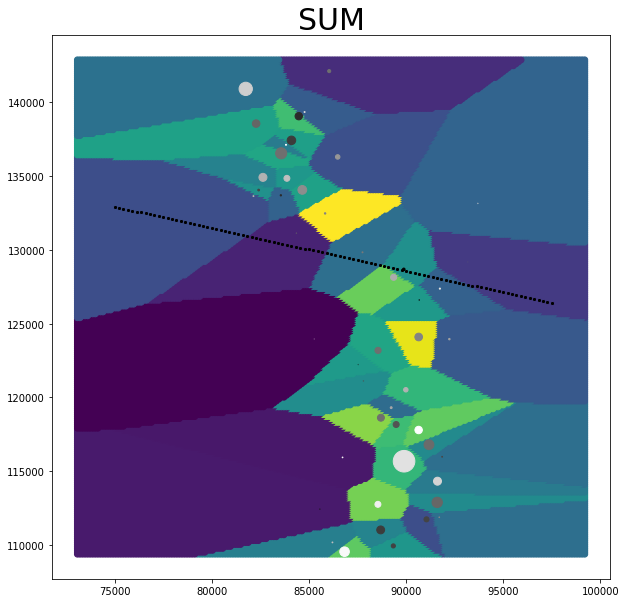

In [95]:
t = np.linspace(75000, 97500, 100)
fault = -.29*t + 154670

plt.figure(figsize=(10,10))
#plt.scatter(sum_interp['Y'], sum_interp['X'], c=sum_interp['PORO(v/v)'], )
plt.scatter(ai['Y'], ai['X'], c=ai['PORO(v/v)'], )
uppers = wells
plt.scatter(uppers['Y(ft)'], uppers['X(ft)'], s=uppers['Sum_Production']/500, c=uppers['Age'], cmap='gray')

plt.title('SUM', fontsize=30)
plt.scatter(t, fault, s=5, c='black', marker='x', label='faultline')
# validate using existing wells

In [99]:
data

,well_id,MD(ft),PORO(v/v),RHOB(g/cm3),DTS(us/ft),DT(us/ft),PEF(B/E),RD(OHMM),RS(OHMM),ROP,...,AI_lower(2021-12-20),AI_upper(2021-12-20),scaled_X,scaled_Y,scaled_MD,perm_est,sum,Well,diff_lower,diff_upper
0,WP0,4725.391739,0.123952,2.570550,130.203580,75.877758,7.374498,159.957113,163.229965,15.932319,...,6634.575426,6527.501690,1.248842,-4.192089,-12.267776,9.279788,220.623568,WP0,77.328918,-3.218868
1,WP1,4868.900545,0.197252,2.469263,128.033236,92.942081,0.050404,177.904391,178.418855,25.259734,...,6609.410946,6523.670945,0.774485,-3.986422,-12.253123,33.898785,967.220104,WP1,69.974609,1.306419
2,WP10,4818.174657,0.135442,2.392931,127.631000,86.678756,4.433433,189.982991,184.900881,18.849304,...,6514.257843,6472.958573,0.936000,-4.335770,-12.258302,10.187213,1165.743198,WP10,45.299221,-21.722941
3,WP12,4808.270995,0.112104,2.470077,143.509402,79.574038,0.042712,133.506294,206.343517,26.269538,...,6362.624740,6322.316898,0.843507,-3.184013,-12.259313,4.183912,17.758218,WP12,13.457871,8.808855
4,WP13,4531.991055,0.116319,2.470225,135.242368,79.086781,6.662322,171.803688,272.042627,15.320779,...,6657.606436,6535.592182,-0.568148,-3.639142,-12.287522,5.352267,586.702696,WP13,102.453196,28.921746
5,WP14,4781.602978,0.138503,2.476446,129.706729,75.289129,5.762926,144.473656,173.289089,19.841724,...,6603.209523,6519.123698,1.017111,-4.187255,-12.262036,9.386436,10456.887672,WP14,72.155735,-21.034330
6,WP15,4405.841183,0.166138,2.342374,137.665461,94.616725,6.752726,82.461831,83.107373,29.348219,...,6591.247729,6491.410104,-1.563761,-3.884232,-12.300403,18.689149,89215.309574,WP15,87.817361,-0.068139
7,WP16,4562.928038,0.132173,2.482244,117.720691,76.430410,5.907931,145.416383,169.218916,19.972302,...,6594.903877,6497.647510,-1.222906,-3.397418,-12.284364,8.524977,37745.757428,WP16,93.171297,17.853044
8,WP17,4600.599989,0.171052,2.351391,135.123632,89.054847,4.039047,266.396683,229.007122,20.025336,...,6654.707208,6534.917152,-1.236396,-3.709010,-12.280517,19.741620,23612.440193,WP17,102.483309,26.175133
9,WP18,4552.206377,0.167064,2.225759,130.311944,96.047062,3.777041,146.180906,113.798245,25.712574,...,6661.476053,6535.657810,-0.722578,-3.495005,-12.285458,17.179852,7935.172962,WP18,89.834129,36.031642


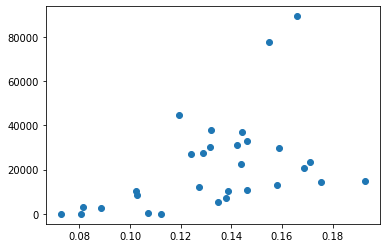

In [98]:

u = data[data['Completion Zone'] == 0]
#plt.scatter(u['AI_lower(2021-12-20)'], u['sum'])
plt.scatter(u['PORO(v/v)'], u['sum'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6b71fecc-b405-4b93-bce3-c5ed6c21c449' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>